In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
from IPython.display import Image, IFrame
from IPython.core.display import HTML
from IPython.display import Latex

# Backpropagation

## Gradient for a neural network

We consider a neural network with $n$ input $(x_1,...,x_n)$ and one output. That defines a fonction $F \colon \mathbb{R}^n \to \mathbb{R}$, $(x_1,...,x_n) \mapsto F(x_1,...,x_n)$.

Let $(a_1,...,a_m)$ be the set of weights of this neural network. Now we consider $(a_1,...,a_m)$ as variables and the function $\widetilde{F} \colon (a_1,...,a_m) \mapsto \widetilde{F}(a_1,...,a_m)$. 

In particular, we are interested in 
$$\frac{\partial \widetilde{F}}{\partial a_j}$$ for all $j \in \{1,...,m\}$ and then the gradient of a cost function $E = (\widetilde{F}-y_0)^2$.

### Gradient formula

We consider this part of neural network :
    
<img src = "img/gradient1.png"></img>

and only one input in the red neuron with weight $a$ and activation function $g$.

- $f$, $g$, $h$ are activation function ;
- $a$ and $b$ are weights ;
- $F$ is the function of the neural network.

By chain rule, we obtain :
$$\frac{\partial F}{\partial a} = f \cdot \frac{g'}{g}\cdot b \cdot \frac{\partial F}{\partial b}$$

With multiple output, it is quite similar :

<img src = "img/gradient2.png"> </img>

$$\frac{\partial F}{\partial a} = \sum_{i=1}^{\ell} f \cdot \frac{g'}{g}\cdot b_i \cdot \frac{\partial F}{\partial b_i}$$

To understand the chain rule adapted to a neural network, think to this pattern :

<img src="img/gradient_chainrule1.png"></img>

that leads to this :

<img src="img/gradient_chainrule2.png"></img>

or this particular case :

<img src="img/gradient_chainrule3.png"></img>

or this one with a bias : 
<img src="img/gradient_chainrule4.png"></img>



### Exercise

This is a very simple neural network : 

<img src="img/gradient_chainrule_ex1.png"></img>

Using formulas above, compute the gradient of $F$ on value $(x,a,b,c) = (2,3,4,5)$.

**Answer :** From right to left. 

First compute $\frac{\partial F}{\partial c} = 100 \times \frac{1}{500} = \frac{1}{5}$

then $\frac{\partial F}{\partial a} = 2 \times \frac{20}{100} \times 5 \times \frac{1}{5} = \frac{2}{5}$ 

and $\frac{\partial F}{\partial b} = 1 \times \frac{20}{100} \times 5 \times \frac{1}{5} = \frac{1}{5}$.

Even it is useless, we can compute $\frac{\partial F}{\partial x} = 1 \times \frac{1}{2} \times 3 \times \frac{\partial F}{\partial a} = \frac{3}{5}$.

Generalize this computation with a program which compute these partial derivatives for all values $(x,a,b,c)$ and any activation functions.

In [3]:
def derivatives(f,x,h):
    df  = (f(x+h)-f(x))/(h)
    return df

def g1(x):
    return x**2

def g2(x):
    return np.log(x)

In [4]:
X = np.array([2,3,4,5])
eps = 1e-8

In [5]:
dFc = derivatives(g2,X[3]*g1(X[0]*X[1]+X[2]),eps)*g1(X[0]*X[1]+X[2])
print(dFc)

0.2000000165480742


In [6]:
dFa = X[0]*derivatives(g1,X[0]*X[1]+X[2],eps)/g1(X[0]*X[1]+X[2])*X[3]*dFc
print(dFa)

0.40000006619229955


In [7]:
dFb = derivatives(g1,X[0]*X[1]+X[2],eps)/g1(X[0]*X[1]+X[2])*X[3]*dFc
print(dFb)

0.20000003309614978


In [8]:
dFx = X[1]*derivatives(g1,X[0]*X[1]+X[2],eps)/g1(X[0]*X[1]+X[2])*X[3]*dFc
print(dFx)

0.6000000992884493


In [9]:
gradF = dFa,dFb,dFc
print(gradF)

(0.40000006619229955, 0.20000003309614978, 0.2000000165480742)


### General algorithm

<img src="img/gradient_chainrule_general.png"> </img>

From right to left :

1. Output neuron : $\frac{\partial F}{\partial g_n} = 1$ ;
2. By induction : assume that $\frac{\partial F}{\partial g_{i+1}}$ is already computed, then $\frac{\partial F}{\partial g_{i}} = \frac{\partial F}{\partial g_{i+1}} \cdot a_{i+1} \cdot g'_{i+1}$ and 
$$\frac{\partial F}{\partial a_i} = \frac{\partial F}{\partial g_{i}} \cdot g_{i-1} \cdot g_i'$$

All these formulas are supposed to be evaluated at a point $(x_1,x_2,...)$.

## Gradient descent

#### Algorithm : 
It gives a sequence $x_0,x_1,...$ defined by this algorithm :
1. Compute gradient : $\nabla f(x_k)$ ;
2. Stopping criteria : $||\nabla f(x_k)||<\varepsilon$ ;
3. Choose a step value $\alpha_k >0$ ;
4. Iteration : $x_{k+1} = x_k - \alpha_k \nabla f(x_k)$.

In [10]:

from descent import *
from descente_stochastique import *
from descente_lot import *





def exemple1():
    # 2-var function
    def f(x, y):
        return x**2 + 3*y**2
    
    # handmade gradient
    def grad_f(x, y):
        g = [2*x, 6*y]
        return np.array(g)

    # Test
    print("--- gradient descent ---")
    X0 = np.array([2, 1])    
    my_step = 0.2
    X0 = np.array([-1, -1])    
    my_step = 0.1    
    display_descent(f, grad_f, X0, delta=my_step, nmax = 21)
    graphic_descent_2var_2d(f, grad_f, X0, delta=my_step, nmax = 10, zone = (-2.5,2.5,-1.5,1.5) ) 

    return

--- gradient descent ---
step value 0.1
Number of iterations 21
initial point [-1 -1]
--- stage 0
Point : -1 -1
Gradient  -2 -6
Value of function  4
--- stage 1
Point : -0.8 -0.3999999999999999
Gradient  -1.6 -2.3999999999999995
Value of function  1.1199999999999999
--- stage 2
Point : -0.64 -0.15999999999999995
Gradient  -1.28 -0.9599999999999997
Value of function  0.48639999999999994
--- stage 3
Point : -0.512 -0.06399999999999997
Gradient  -1.024 -0.38399999999999984
Value of function  0.27443199999999995
--- stage 4
Point : -0.4096 -0.025599999999999984
Gradient  -0.8192 -0.1535999999999999
Value of function  0.16973824
--- stage 5
Point : -0.32768 -0.010239999999999992
Gradient  -0.65536 -0.06143999999999995
Value of function  0.10768875520000001
--- stage 6
Point : -0.26214400000000004 -0.004095999999999996
Gradient  -0.5242880000000001 -0.02457599999999998
Value of function  0.06876980838400003
--- stage 7
Point : -0.20971520000000005 -0.0016383999999999982
Gradient  -0.41943040

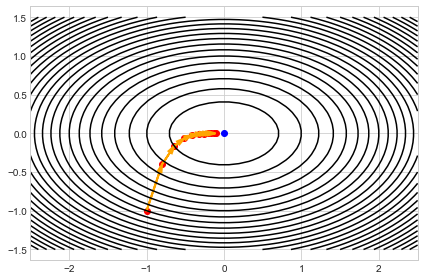

In [11]:
exemple1()

## First example with one neuron

### Model

We want to separate the plane according to these two sets of points : 

blue circles : (0, 3), (1, 1.5), (1, 4), (1.5, 2.5), (2, 2.5), (3, 3.5), (3.5, 3.25), (4, 3), (4, 4), (5, 4)

red squares : (1, 1), (2, 0.5), (2, 2), (3, 1.5), (3, 2.75), (4, 1), (4, 2.5), (4.5, 3), (5, 1), (5, 2.25).

with a single neuron perceptron : 

<img src="img/propagation_ex1.png"></img>

The activation function is the sigmoid function.

<img src="img/propagation_ex1_1.png"></img>

The cost function is 
$$E(a,b,c) = \frac{1}{N}\sum_{i=1}^N E_i(a,b,c)$$
where $E_i = (F(x_i,y_i)-t_i)^2$ and $t_i=1$ when $(x_i,y_i)$ is a red square, $t_i=0$ when $(x_i,y_i)$ is a blue circle. 

### Data : training set

In [12]:
blue_points = [(0, 3), (1, 1.5), (1, 4), (1.5, 2.5), (2, 2.5), (3, 3.5), (3.5, 3.25), (4, 3), (4, 4), (5, 4)]
red_points = [(1, 1), (2, 0.5), (2, 2), (3, 1.5), (3, 2.75), (4, 1), (4, 2.5), (4.5, 3), (5, 1), (5, 2.25)]

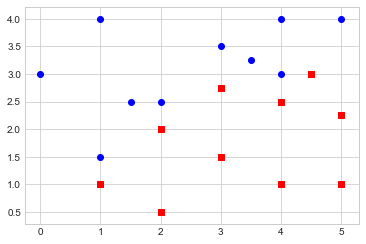

In [13]:
target = []
points = []
for x,y in blue_points:
    target.append(0)
    points.append((x,y))
    plt.scatter(x,y,color='blue')
for x,y in red_points:
    target.append(1)
    points.append((x,y))
    plt.scatter(x,y,color='red',marker='s')
plt.show()



### Gradient descent

We want to find the best weights $W=(a,b,c)$ by iteration : initialize $W_0 = (a_0,b_0,c_0)$, for example $W_0 = (0,1,-2)$ and fix a step value $\delta = 1$. The sequence of weights is define by
$$W_{k+1} = W_k - \delta \cdot \nabla E(W_k)$$

The local error is :
$$E_i(a,b,c) = (\sigma(ax_i+by_i+c)-t_i)^2$$

and the error is the sum of local error where $N$ is the number of points in the training set :

$$E(a,b,c) = \frac{1}{N}\sum_{i=1}^N E_i(a,b,c)$$

Notice that $\sigma' = \sigma(1-\sigma)$ so that 
$$\frac{\partial E_i}{\partial a}(x_i,y_i) = 2x_i \sigma_i(1-\sigma_i)(\sigma_i-t_i)$$
$$\frac{\partial E_i}{\partial b}(x_i,y_i) = 2y_i \sigma_i(1-\sigma_i)(\sigma_i-t_i)$$
$$\frac{\partial E_i}{\partial c}(x_i,y_i) = 2 \sigma_i(1-\sigma_i)(\sigma_i-t_i)$$
where $\sigma_i = \sigma(ax_i+by_i+c)$.

Finaly, $$\nabla E(W_k) = \frac{1}{N}\sum_{i=1}^N \left[\frac{\partial E_i}{\partial a},\frac{\partial E_i}{\partial b},\frac{\partial E_i}{\partial c}\right]$$

In [14]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

def p(y):
    return y*(1-y)

def dsigmoid(y):
    return p(sigmoid(y))

In [15]:
W = np.array([0,1,-2])


def gradE(W,x,y,t):
    sigma = sigmoid(np.dot(W[:2],np.array([x,y]))+W[2])
    gradEa = 2*x*sigma*(1-sigma)*(sigma-t)
    gradEb = 2*y*sigma*(1-sigma)*(sigma-t)
    gradEc = 2*sigma*(1-sigma)*(sigma-t)
    return gradEa,gradEb,gradEc

def E(x,y,W,t):
    return (sigmoid(np.dot(W[:2],np.array([x,y]))+W[2])-t)**2

def gradE_total(W):
    g = np.array([0,0,0])
    i=0
    for (x,y) in points:
        g = np.array(gradE(W,x,y,target[i])) + g
        i+=1
    g=g/(i)
    return g

def E_total(W):
    e = 0.0
    i=0
    for (x,y) in points:
        e = E(x,y,W,target[i]) + e
        i+=1
    e = e/(i)
    return e

In [24]:
#init
W = np.array([0,1,-2])
epoch = 300  #change number of iterations
delta = 1
error = []

for i in range(epoch):
    W = W - delta*gradE_total(W)
    error.append(E_total(W))

print('(a,b,c) = '+str(W))

(a,b,c) = [ 1.53507308 -2.74356737  2.26410298]


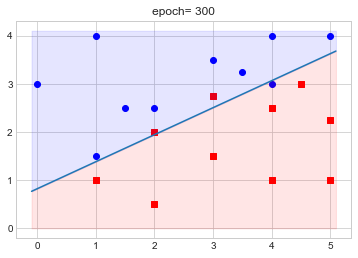

Error = 0.07738749480250243


In [25]:
for x,y in blue_points:
    plt.scatter(x,y,color='blue')
for x,y in red_points:
    plt.scatter(x,y,color='red',marker='s')
h = np.array([-0.1,5.1])
v = (-W[0]*h-W[2])/W[1]  #equation of boundary line
plt.fill_between(h,v,4.1,color="blue",alpha=0.1)
plt.fill_between(h,v,0,color="red",alpha=0.1)

plt.plot(h,v,'-')
plt.title('epoch= '+str(epoch))
plt.show()
print('Error = '+ str(E_total(W)))

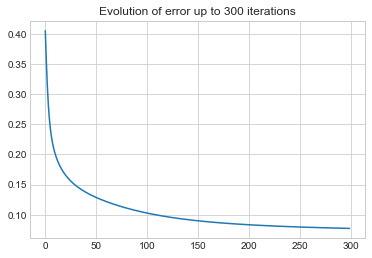

In [26]:
plt.plot(range(epoch),error)
plt.title('Evolution of error up to '+str(epoch)+ ' iterations')
plt.show()

## Second example : approximate a step function

We want to find a neural network realizing a function $F$ such that :
* if $x \in [0;2] \cup [6;8]$, $F(x)=0$ ;
* if $x \in [3;5]$, $F(x) = 1$

### Data : training set
We consider 10 blue circles on $[0;2]$, 10 blue circles on $[6;8]$ and 10 red squares on $[3;5]$.



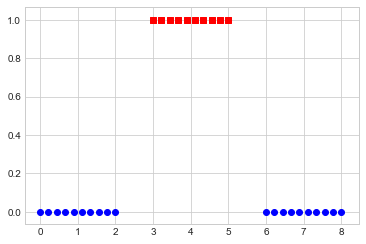

In [27]:
blue_circles = []
target = []
X = np.linspace(0,2,10)

for x in X:
    blue_circles.append((x,0))

X = np.linspace(6,8,10)

for x in X:
    blue_circles.append((x,0))

red_squares = []

X = np.linspace(3,5,10)

for x in X:
    red_squares.append((x,1))

for x,y in blue_circles:
    plt.scatter(x,y,color='blue')
for x,y in red_squares:
    plt.scatter(x,y,color='red',marker='s')

points = blue_circles+red_squares
plt.show()

## Model

We choose this architecture of neural network :

<img src="img/propagation_ex2.png"></img>

with the sigmoid activation function. 

Thus, we are looking for 7 weights $(a_1,a_2,...,a_7)$. 

In [28]:
W = [0.0,1.0,0.0,-1.0,1.0,1.0,-1.0]

def F(x,W):
    layer1 = [sigmoid(W[0]*x+W[1]),sigmoid(W[2]*x+W[3])]
    layer2 = sigmoid(W[4]*layer1[0]+W[5]*layer1[1]+W[6])
    return layer2

def gradF(x,W):
    layer1 = [sigmoid(W[0]*x+W[1]),sigmoid(W[2]*x+W[3])]
    layer2 = sigmoid(W[4]*layer1[0]+W[5]*layer1[1]+W[6])
    dsigma2 = p(layer2)
    g5 = layer1[0]*dsigma2
    g6 = layer1[1]*dsigma2
    g7 = dsigma2
    dsigma11 = p(layer1[0])
    dsigma12 = p(layer1[1])
    g2 = dsigma11/layer1[0]*W[4]*g5
    g1 = x * g2
    g4 = dsigma12/layer1[1]*W[5]*g6
    g3 = x * g4
    grad = [g1,g2,g3,g4,g5,g6,g7]
    return grad

def gradE(W,x,y):
    output = F(x,W)
    grad = [2*(F(x,W)-y)*g for g in gradF(x,W)]
    return grad


def E(W,x,t):
    return (F(x,W)-t)**2

def gradE_total(W):
    g = np.array([0,0,0,0,0,0,0])
    i=0
    for (x,y) in points:
        g = np.array(gradE(W,x,y)) + g
        i+=1
    return g/i

def E_total(W):
    e = 0.0
    i=0
    for (x,y) in points:
        e = E(W,x,y) + e
        i+=1
    e = e/(i)
    return e

In [29]:
epoch = 5000  #change number of iterations
delta = 1
error = []

for i in range(epoch):
    W = W - delta*gradE_total(W)
    error.append(E_total(W))

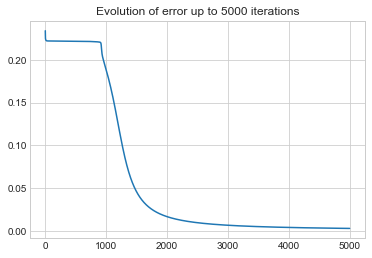

In [30]:
plt.plot(range(epoch),error)
plt.title('Evolution of error up to '+str(epoch)+ ' iterations')
plt.show()

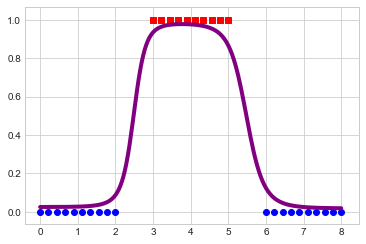

In [31]:
for x,y in blue_circles:
    plt.scatter(x,y,color='blue')
for x,y in red_squares:
    plt.scatter(x,y,color='red',marker='s')
X = np.linspace(0,8,200)
Y = [F(x,W) for x in X]
plt.plot(X,Y,color='purple',linewidth=4)

plt.show()